Mounted at /content/drive
Found 3360 images belonging to 4 classes.
Found 838 images belonging to 4 classes.
Validation classes: {'Blight': 0, 'Common_Rust': 1, 'Gray_Leaf_Spot': 2, 'Healthy': 3}
Validation samples: 838


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 922s 9s/step - accuracy: 0.6001 - loss: 1.9119 - val_accuracy: 0.7792 - val_loss: 0.4566
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 381s 4s/step - accuracy: 0.8600 - loss: 0.3335 - val_accuracy: 0.8484 - val_loss: 0.3551
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 355s 3s/step - accuracy: 0.9008 - loss: 0.2566 - val_accuracy: 0.8473 - val_loss: 0.3870
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 352s 3s/step - accuracy: 0.9569 - loss: 0.1301 - val_accuracy: 0.8556 - val_loss: 0.4206
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 365s 3s/step - accuracy: 0.9658 - loss: 0.0922 - val_accuracy: 0.8652 - val_loss: 0.5253
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 349s 3s/step - accuracy: 0.9715 - loss: 0.0873 - val_accuracy: 0.8580 - val_loss: 0.6260
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 354s 3s/step - accuracy: 0.9912 - loss: 0.0374 - val_accuracy: 0.8317 - val_loss: 1.1910
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 349s 3s/step - accuracy: 0.9839 - loss: 0.0486 - val_accu

✅ Model saved as plants_diseases_cnn_v1.h5!


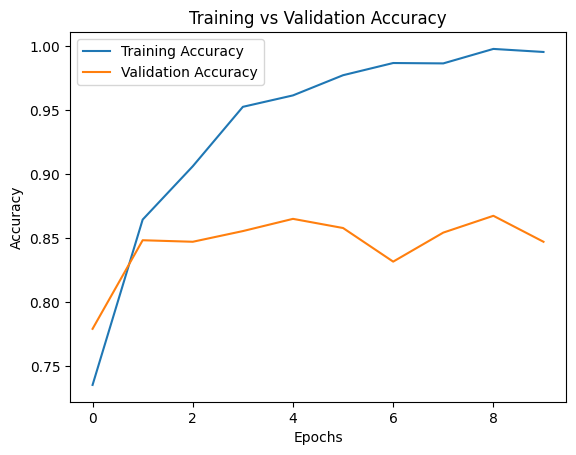

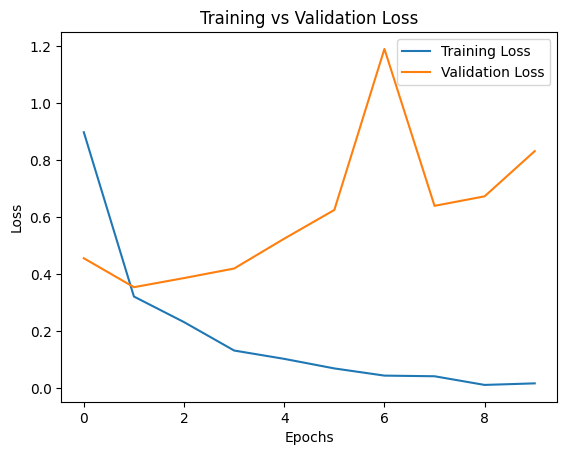

In [ ]:
# Install TensorFlow (if necessary)
!pip install tensorflow

# Import necessary libraries
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf
import matplotlib.pyplot as plt

# Mount Google Drive to access your dataset
drive.mount('/content/drive')

# Define the directory for the training images
train_dir = "/content/drive/MyDrive/datasets_plant/train"  # <-- Update this path if necessary

# Preprocess and load images
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training data (train_data)
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # This defines the training data subset
)

# Load validation data (val_data)
val_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # This defines the validation data subset
)

# Verify the validation data
print("Validation classes:", val_data.class_indices)
print("Validation samples:", val_data.samples)

# Define the CNN model
model = Sequential([
    Input(shape=(224, 224, 3)),  # Input layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # Replace 4 with your number of classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_data,          # Training dataset
    epochs=10,           # Number of training cycles
    validation_data=val_data  # Validation dataset
)

# Save the trained model
model.save('/content/drive/MyDrive/datasets_plant/plants_diseases_cnn_v1.h5')
print("✅ Model saved as plants_diseases_cnn_v1.h5!")

# Access the history object and plot the results
history_dict = history.history

# Plot training and validation accuracy
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [7]:
# Verify the directory structure to ensure the image exists in the correct path
import os
os.listdir('/content/drive/MyDrive/datasets_plant')  # Change the path if needed


['test image.jpg', 'train', 'plants_diseases_cnn_v1.h5']

In [1]:
# Define the correct path to the model and test image
model_path = '/content/drive/MyDrive/datasets_plant/plants_diseases_cnn _v1.h5'  # Path to your saved model
img_path = '/content/drive/MyDrive/datasets_plant/test image.jpg'  # Correct path to your test image


In [7]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
test_image_path = "/content/drive/MyDrive/plant_dataset/test image.jpg"

Saving test image.jpg to test image (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


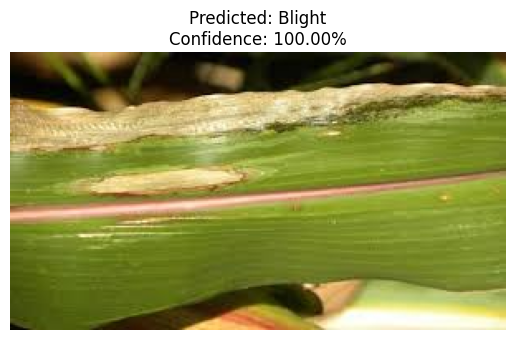

In [13]:
from google.colab import files
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Ensure train_data is defined or manually set class indices
class_indices = {0: 'Blight', 1: 'Common Rust', 2: 'Grey Leaf Spot', 3: 'Healthy'}  # Update with your actual class names

# Method 1: Upload directly to Colab (if needed)
uploaded = files.upload()  # Upload your test image
test_image_path = next(iter(uploaded))  # Auto-get path

# Method 2: OR use Google Drive path (if image is already uploaded)
# test_image_path = "/content/drive/MyDrive/plant_dataset/test_image.jpg"  # Update the correct path

try:
    # Load and preprocess image
    img = image.load_img(test_image_path, target_size=(224, 224))
    img = image.img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    # Make prediction
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction) * 100

    # Get class label from indices
    predicted_label = class_indices.get(predicted_class, "Unknown")

    # Display result
    plt.imshow(image.load_img(test_image_path))
    plt.title(f"Predicted: {predicted_label}\nConfidence: {confidence:.2f}%")
    plt.axis('off')
    plt.show()

except FileNotFoundError:
    print(f"🔥 Error: File '{test_image_path}' not found!")
    print("1. Use the file upload button that appears when running files.upload()")
    print("2. Check Google Drive path matches EXACTLY (case-sensitive)")
    print("3. Ensure image is JPG/PNG format")
except Exception as e:
    print(f"❌ Error: {str(e)}")
